## Question 3: Neighbourhoods Trends & Patterns
Can we identify trends or patterns in specific neighbourhoods? Is there a correlation between the type of offence and the premise?


In [2]:
%matplotlib inline

In [3]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
# plt.style.use('Solarize_Light2')
plt.style.use('bmh')

In [4]:
#Read in csv file and inspect dataframe
file = pd.read_csv('../resources/mci_no_duplicates_2014_and_over.csv')
df = pd.DataFrame(file)
df.head()

,_id,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,LOCATION_TYPE,PREMISES_TYPE,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140
0,2,GO-20141260701,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,3.0,...,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,2120,200,B&E,Break and Enter,70,South Riverdale,70,South Riverdale (70)
1,3,GO-20141260889,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,4.0,...,"Apartment (Rooming House, Condo)",Apartment,1430,100,Assault,Assault,74,North St.James Town,74,North St.James Town (74)
2,4,GO-20141260973,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,4.0,...,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,2130,210,Theft Over,Theft Over,NSA,NSA,NSA,NSA
3,5,GO-20141261050,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,4.0,...,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,1430,100,Assault,Assault,69,Blake-Jones,66,Danforth (66)
4,6,GO-20141259344,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,2.0,...,Bar / Restaurant,Commercial,1420,110,Assault Bodily Harm,Assault,164,Wellington Place,77,Waterfront Communities-The Island (77)


In [5]:
#Keep only necessary columns
df = df[['EVENT_UNIQUE_ID', 'OCC_YEAR', 'OCC_MONTH', 'LOCATION_TYPE', 'PREMISES_TYPE', 'OFFENCE', 'MCI_CATEGORY', 'NEIGHBOURHOOD_158']]
df

,EVENT_UNIQUE_ID,OCC_YEAR,OCC_MONTH,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,NEIGHBOURHOOD_158
0,GO-20141260701,2014.0,January,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,B&E,Break and Enter,South Riverdale
1,GO-20141260889,2014.0,January,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,North St.James Town
2,GO-20141260973,2014.0,January,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Theft Over,Theft Over,NSA
3,GO-20141261050,2014.0,January,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Assault,Assault,Blake-Jones
4,GO-20141259344,2014.0,January,Bar / Restaurant,Commercial,Assault Bodily Harm,Assault,Wellington Place
...,...,...,...,...,...,...,...,...
298467,GO-20222554300,2022.0,December,"Single Home, House (Attach Garage, Cottage, Mo...",House,B&E W'Intent,Break and Enter,Wexford/Maryvale
298468,GO-20222557893,2022.0,December,Other Commercial / Corporate Places (For Profi...,Commercial,B&E,Break and Enter,Milliken
298469,GO-20222559486,2022.0,December,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,Forest Hill North
298470,GO-20222557956,2022.0,December,Convenience Stores,Commercial,Assault,Assault,Rosedale-Moore Park


In [6]:
#Check dtypes
df.dtypes

EVENT_UNIQUE_ID       object
OCC_YEAR             float64
OCC_MONTH             object
LOCATION_TYPE         object
PREMISES_TYPE         object
OFFENCE               object
MCI_CATEGORY          object
NEIGHBOURHOOD_158     object
dtype: object

In [7]:
#Convert OCC_YEAR from float to integer 
df['OCC_YEAR'] = df['OCC_YEAR'].astype('int64')
df.dtypes

EVENT_UNIQUE_ID      object
OCC_YEAR              int64
OCC_MONTH            object
LOCATION_TYPE        object
PREMISES_TYPE        object
OFFENCE              object
MCI_CATEGORY         object
NEIGHBOURHOOD_158    object
dtype: object

In [8]:
#Remove rows where NEIGHBOURHOOD_158 = NSA (no specified address) as per https://data.torontopolice.on.ca/datasets/TorontoPS::victims-of-crime-asr-vc-tbl-001/about
df = df.loc[df['NEIGHBOURHOOD_158'] != 'NSA']
df
#This removed about 5,000 rows of data

,EVENT_UNIQUE_ID,OCC_YEAR,OCC_MONTH,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,NEIGHBOURHOOD_158
0,GO-20141260701,2014,January,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,B&E,Break and Enter,South Riverdale
1,GO-20141260889,2014,January,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,North St.James Town
3,GO-20141261050,2014,January,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Assault,Assault,Blake-Jones
4,GO-20141259344,2014,January,Bar / Restaurant,Commercial,Assault Bodily Harm,Assault,Wellington Place
5,GO-20141260233,2014,January,Other Commercial / Corporate Places (For Profi...,Commercial,B&E W'Intent,Break and Enter,Dorset Park
...,...,...,...,...,...,...,...,...
298467,GO-20222554300,2022,December,"Single Home, House (Attach Garage, Cottage, Mo...",House,B&E W'Intent,Break and Enter,Wexford/Maryvale
298468,GO-20222557893,2022,December,Other Commercial / Corporate Places (For Profi...,Commercial,B&E,Break and Enter,Milliken
298469,GO-20222559486,2022,December,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,Forest Hill North
298470,GO-20222557956,2022,December,Convenience Stores,Commercial,Assault,Assault,Rosedale-Moore Park


In [9]:
#Rename columns
df = df.rename(columns = {'EVENT_UNIQUE_ID': 'EVENT_ID', 'NEIGHBOURHOOD_158': 'NEIGHBOURHOOD'})
df

,EVENT_ID,OCC_YEAR,OCC_MONTH,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,NEIGHBOURHOOD
0,GO-20141260701,2014,January,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,B&E,Break and Enter,South Riverdale
1,GO-20141260889,2014,January,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,North St.James Town
3,GO-20141261050,2014,January,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Assault,Assault,Blake-Jones
4,GO-20141259344,2014,January,Bar / Restaurant,Commercial,Assault Bodily Harm,Assault,Wellington Place
5,GO-20141260233,2014,January,Other Commercial / Corporate Places (For Profi...,Commercial,B&E W'Intent,Break and Enter,Dorset Park
...,...,...,...,...,...,...,...,...
298467,GO-20222554300,2022,December,"Single Home, House (Attach Garage, Cottage, Mo...",House,B&E W'Intent,Break and Enter,Wexford/Maryvale
298468,GO-20222557893,2022,December,Other Commercial / Corporate Places (For Profi...,Commercial,B&E,Break and Enter,Milliken
298469,GO-20222559486,2022,December,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,Forest Hill North
298470,GO-20222557956,2022,December,Convenience Stores,Commercial,Assault,Assault,Rosedale-Moore Park


In [10]:
#Rename location types for readability
renamed_locations = {'Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg': 'Other Commercial Places',
                    'Construction Site (Warehouse, Trailer, Shed)': 'Construction Site', 
                    'Single Home, House (Attach Garage, Cottage, Mobile)': 'Single Home/House',
                    'Parking Lots (Apt., Commercial Or Non-Commercial)': 'Parking Lots',
                    'Retirement Home': 'Retirement Home', 'Apartment (Rooming House, Condo)': 'Apartment',
                    'Streets, Roads, Highways (Bicycle Path, Private Road)': 'Streets, Roads, Highways',
                    'Bar / Restaurant': 'Bar/Restaurant', 'Ttc Bus Stop / Shelter / Loop': 'Public Transit',
                    'Schools During Supervised Activity': 'Schools, Supervised',
                    'Hospital / Institutions / Medical Facilities (Clinic, Dentist, Morgue)': 'Medical Facilities',
                    'Open Areas (Lakes, Parks, Rivers)': 'Open Areas', 'Dealership (Car, Motorcycle, Marine, Trailer, Etc.)': 'Dealership',
                    'Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)': 'Commercial Dwelling Unit',
                    'Jails / Detention Centres': 'Jails/Detention Centres',
                    "Other Non Commercial / Corporate Places (Non-Profit, Gov'T, Firehall)": 'Other Non Commercial Places',
                    'Go Train': 'Public Transit', 'Private Property Structure (Pool, Shed, Detached Garage)': 'Private Property Structure',
                    'Religious Facilities (Synagogue, Church, Convent, Mosque)': 'Religious Facilities',
                    'Police / Courts (Parole Board, Probation Office)': 'Police/Courts', 'Convenience Stores': 'Convenience Stores',
                    'Gas Station (Self, Full, Attached Convenience)': 'Gas Stations', 'Go Station': 'Public Transit',
                    'Group Homes (Non-Profit, Halfway House, Social Agency)': 'Group Homes', 'Schools During Un-Supervised Activity': 'Schools, Unsupervised',
                    'Ttc Bus': 'Public Transit', 'Cargo Train': 'Cargo Train', 'Bank And Other Financial Institutions (Money Mart, Tsx)': 'Financial Institutions',
                    'Universities / Colleges': 'Secondary Education', 'Go Bus': 'Public Transit', 'Other Regional Transit System Vehicle': 'Public Transit',
                    'Nursing Home': 'Nursing Home', 'Community Group Home': 'Group Homes', 'Pharmacy': 'Pharmacy', 'Homeless Shelter / Mission': 'Homeless Shelters'}
df['LOCATION_TYPE'] = df['LOCATION_TYPE'].replace(renamed_locations)
df

,EVENT_ID,OCC_YEAR,OCC_MONTH,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,NEIGHBOURHOOD
0,GO-20141260701,2014,January,Commercial Dwelling Unit,Commercial,B&E,Break and Enter,South Riverdale
1,GO-20141260889,2014,January,Apartment,Apartment,Assault,Assault,North St.James Town
3,GO-20141261050,2014,January,"Streets, Roads, Highways",Outside,Assault,Assault,Blake-Jones
4,GO-20141259344,2014,January,Bar/Restaurant,Commercial,Assault Bodily Harm,Assault,Wellington Place
5,GO-20141260233,2014,January,Other Commercial Places,Commercial,B&E W'Intent,Break and Enter,Dorset Park
...,...,...,...,...,...,...,...,...
298467,GO-20222554300,2022,December,Single Home/House,House,B&E W'Intent,Break and Enter,Wexford/Maryvale
298468,GO-20222557893,2022,December,Other Commercial Places,Commercial,B&E,Break and Enter,Milliken
298469,GO-20222559486,2022,December,Apartment,Apartment,Assault,Assault,Forest Hill North
298470,GO-20222557956,2022,December,Convenience Stores,Commercial,Assault,Assault,Rosedale-Moore Park


In [11]:
#Sort df by sum of events (offences) by neighbourhood
neighbourhood_total_offences = df.groupby('NEIGHBOURHOOD', as_index = False)['EVENT_ID'].count()
neighbourhood_total_offences

,NEIGHBOURHOOD,EVENT_ID
0,Agincourt North,1544
1,Agincourt South-Malvern West,2331
2,Alderwood,845
3,Annex,4391
4,Avondale,701
...,...,...
153,Yonge-Doris,1125
154,Yonge-Eglinton,1097
155,Yonge-St.Clair,615
156,York University Heights,5746


In [12]:
#Sort from highest to lowest
sorted_neighbourhood_total_offences = neighbourhood_total_offences.sort_values(by = 'EVENT_ID', ascending = False)
sorted_neighbourhood_total_offences

,NEIGHBOURHOOD,EVENT_ID
139,West Humber-Clairville,8053
93,Moss Park,7320
36,Downtown Yonge East,6263
152,Yonge-Bay Corridor,5840
156,York University Heights,5746
...,...,...
155,Yonge-St.Clair,615
87,Maple Leaf,573
150,Woodbine-Lumsden,559
56,Guildwood,535


In [13]:
#Store top 10 and bottom 10 neighbourhoods in lists
top_10_neighbourhood_names = list(sorted_neighbourhood_total_offences.head(10)['NEIGHBOURHOOD'])
bottom_10_neighbourhood_names = list(sorted_neighbourhood_total_offences.tail(10)['NEIGHBOURHOOD'])

In [14]:
#Create 2 dataframes for the top 10 and bottom 10
top_10_df = df.loc[(df['NEIGHBOURHOOD'] == top_10_neighbourhood_names[0]) | (df['NEIGHBOURHOOD'] == top_10_neighbourhood_names[1]) | 
                   (df['NEIGHBOURHOOD'] == top_10_neighbourhood_names[2]) | (df['NEIGHBOURHOOD'] == top_10_neighbourhood_names[3]) | 
                   (df['NEIGHBOURHOOD'] == top_10_neighbourhood_names[4]) | (df['NEIGHBOURHOOD'] == top_10_neighbourhood_names[5]) | 
                   (df['NEIGHBOURHOOD'] == top_10_neighbourhood_names[6]) | (df['NEIGHBOURHOOD'] == top_10_neighbourhood_names[7]) | 
                   (df['NEIGHBOURHOOD'] == top_10_neighbourhood_names[8]) | (df['NEIGHBOURHOOD'] == top_10_neighbourhood_names[9])]

bottom_10_df = df.loc[(df['NEIGHBOURHOOD'] == bottom_10_neighbourhood_names[0]) | (df['NEIGHBOURHOOD'] == bottom_10_neighbourhood_names[1]) | 
                   (df['NEIGHBOURHOOD'] == bottom_10_neighbourhood_names[2]) | (df['NEIGHBOURHOOD'] == bottom_10_neighbourhood_names[3]) | 
                   (df['NEIGHBOURHOOD'] == bottom_10_neighbourhood_names[4]) | (df['NEIGHBOURHOOD'] == bottom_10_neighbourhood_names[5]) | 
                   (df['NEIGHBOURHOOD'] == bottom_10_neighbourhood_names[6]) | (df['NEIGHBOURHOOD'] == bottom_10_neighbourhood_names[7]) | 
                   (df['NEIGHBOURHOOD'] == bottom_10_neighbourhood_names[8]) | (df['NEIGHBOURHOOD'] == bottom_10_neighbourhood_names[9])]

## Top 10 Neighbourhoods

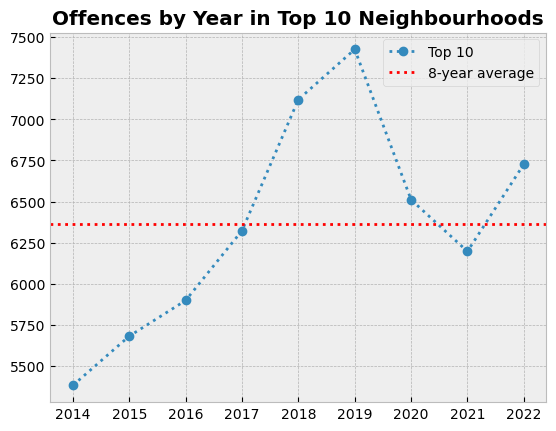

In [15]:
#Group top 10 df by occurrence year and get the count of events
top_10_year = top_10_df.groupby('OCC_YEAR', as_index = False)['EVENT_ID'].count()
#Plot offences by year 
plt.plot(top_10_year['OCC_YEAR'], top_10_year['EVENT_ID'], 'o:', label = 'Top 10')
#Plot a horizontal line representing the 8-year average of offences in the top 10 neighbourhoods
plt.axhline(top_10_year['EVENT_ID'].mean(), label = '8-year average', color = 'r').set_linestyle(':')
#Set title and legend
plt.title('Offences by Year in Top 10 Neighbourhoods', fontdict = {'weight': 700})
plt.legend(loc = 'best')
plt.show()

In [57]:
#Get the year over year % change in offences for the top 10 neighbourhoods
top_10_year['Pct Change YoY'] = top_10_year['EVENT_ID'].pct_change()
top_10_year

,OCC_YEAR,EVENT_ID,Pct Change YoY
0,2014,5383,NaN
1,2015,5682,0.055545
2,2016,5899,0.038191
3,2017,6323,0.071877
4,2018,7120,0.126048
5,2019,7425,0.042837
6,2020,6511,-0.123098
7,2021,6197,-0.048226
8,2022,6727,0.085525


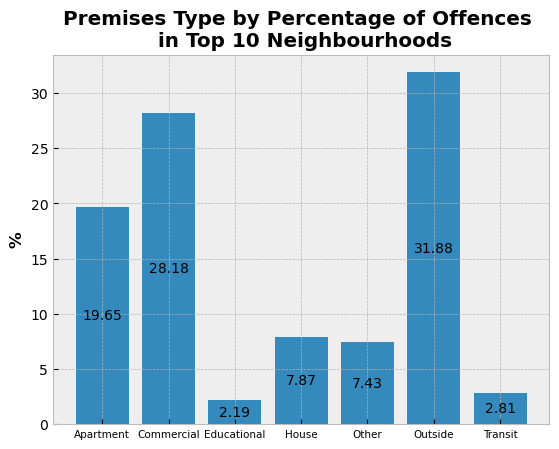

In [18]:
#Premises type for top 10 neighbourhoods
top_10_premises = top_10_df.groupby('PREMISES_TYPE', as_index = False)['EVENT_ID'].count()
top_10_premises['Pct of Offences'] = round((top_10_premises['EVENT_ID'] / top_10_premises['EVENT_ID'].sum()) * 100, 2)

#Plot premises type
fig, ax = plt.subplots(nrows = 1, ncols = 1)
#Set font size of x ticks for readability
plt.rcParams['xtick.labelsize'] = 7.5
#Plot premises type
ax.bar(top_10_premises['PREMISES_TYPE'], top_10_premises['Pct of Offences'])
#Set bar labels
for container in ax.containers:
    ax.bar_label(container, label_type = 'center')
#Set title and y axis label
plt.title('Premises Type by Percentage of Offences \n in Top 10 Neighbourhoods', fontdict = {'weight': 700})
plt.ylabel('%', fontdict = {'weight': 700})
plt.show()

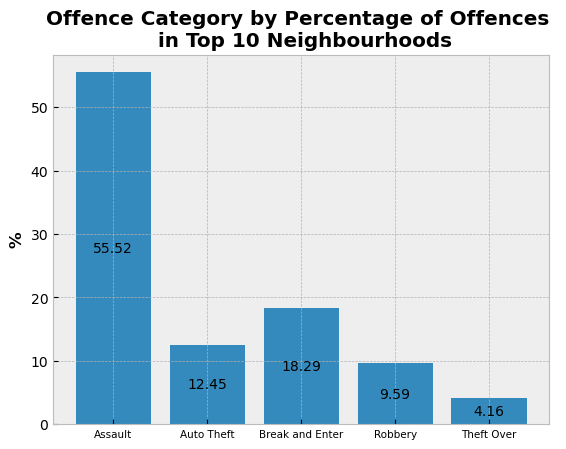

In [19]:
#MCI categories for top 10 neighbourhoods
top_10_mci = top_10_df.groupby('MCI_CATEGORY', as_index = False)['EVENT_ID'].count()
top_10_mci['Pct of Offences'] = round((top_10_mci['EVENT_ID'] / top_10_mci['EVENT_ID'].sum()) * 100, 2)
#Plot MCI categories
fig, ax = plt.subplots(nrows = 1, ncols = 1)
#Set x ticks font size for readability
plt.rcParams['xtick.labelsize'] = 9
#Generate bar plot
ax.bar(top_10_mci['MCI_CATEGORY'], top_10_mci['Pct of Offences'])
#Set bar labels
for container in ax.containers:
    ax.bar_label(container, label_type = 'center')
#Set title and y axis label
plt.title('Offence Category by Percentage of Offences \n in Top 10 Neighbourhoods', fontdict = {'weight': 700})
plt.ylabel('%', fontdict = {'weight': 700})
plt.show()


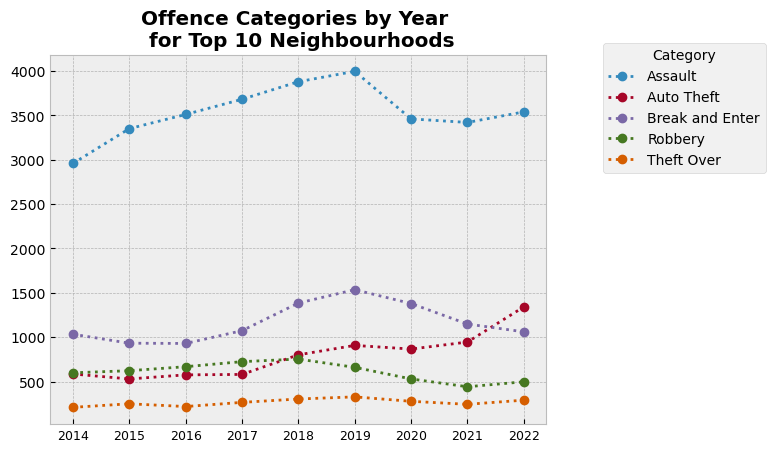

In [20]:
#Plot MCI categories by year for top 10
#Create separate series for each MCI category
top_10_assault = top_10_df.loc[top_10_df['MCI_CATEGORY'] == 'Assault'].groupby('OCC_YEAR')['EVENT_ID'].count()
top_10_auto_theft = top_10_df.loc[top_10_df['MCI_CATEGORY'] == 'Auto Theft'].groupby('OCC_YEAR')['EVENT_ID'].count()
top_10_break_enter = top_10_df.loc[top_10_df['MCI_CATEGORY'] == 'Break and Enter'].groupby('OCC_YEAR')['EVENT_ID'].count()
top_10_robbery = top_10_df.loc[top_10_df['MCI_CATEGORY'] == 'Robbery'].groupby('OCC_YEAR')['EVENT_ID'].count()
top_10_theft_over = top_10_df.loc[top_10_df['MCI_CATEGORY'] == 'Theft Over'].groupby('OCC_YEAR')['EVENT_ID'].count()

#Generate figure and plots for each category
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.plot(top_10_assault.index, top_10_assault.values, 'o:', label = 'Assault')
ax.plot(top_10_auto_theft.index, top_10_auto_theft.values, 'o:', label = 'Auto Theft')
ax.plot(top_10_break_enter.index, top_10_break_enter.values,'o:', label = 'Break and Enter')
ax.plot(top_10_robbery.index, top_10_robbery.values, 'o:', label = 'Robbery')
ax.plot(top_10_theft_over.index, top_10_theft_over.values, 'o:', label = 'Theft Over')

#Set title and legend
plt.title('Offence Categories by Year \n for Top 10 Neighbourhoods', fontdict = {'weight': 700})
plt.legend(bbox_to_anchor=(1.1, 1.05), title = 'Category')
plt.show()

## Bottom 10 Neighbourhoods

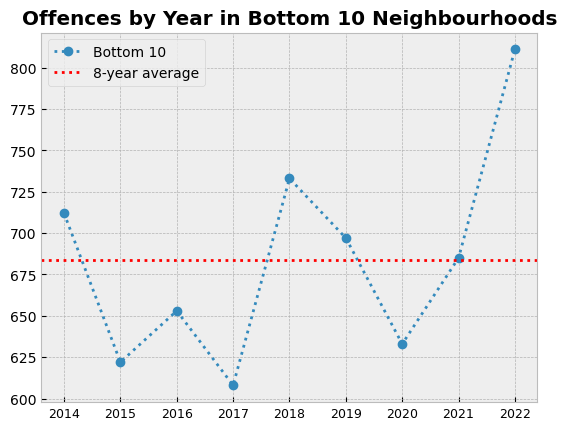

In [21]:
#Group bottom 10 df by occurrence year and get the count of events (offences)
bottom_10_year = bottom_10_df.groupby('OCC_YEAR', as_index = False)['EVENT_ID'].count()
#Plot offences by year
plt.plot(bottom_10_year['OCC_YEAR'], bottom_10_year['EVENT_ID'], 'o:', label = 'Bottom 10')
#Plot a horizontal line representing the 8-year average of offences in the bottom 10 neighbourhoods
plt.axhline(bottom_10_year['EVENT_ID'].mean(), label = '8-year average', color = 'r').set_linestyle(':')
#Set title and legend
plt.title('Offences by Year in Bottom 10 Neighbourhoods', fontdict = {'weight': 700})
plt.legend(loc = 'best')
plt.show()

In [58]:
#Get the year over year % change in offences for the bottom 10 neighbourhoods
bottom_10_year['Pct Change YoY'] = bottom_10_year['EVENT_ID'].pct_change()
bottom_10_year

,OCC_YEAR,EVENT_ID,Pct Change YoY
0,2014,712,NaN
1,2015,622,-0.126404
2,2016,653,0.049839
3,2017,608,-0.068913
4,2018,733,0.205592
5,2019,697,-0.049113
6,2020,633,-0.091822
7,2021,685,0.082148
8,2022,811,0.183942


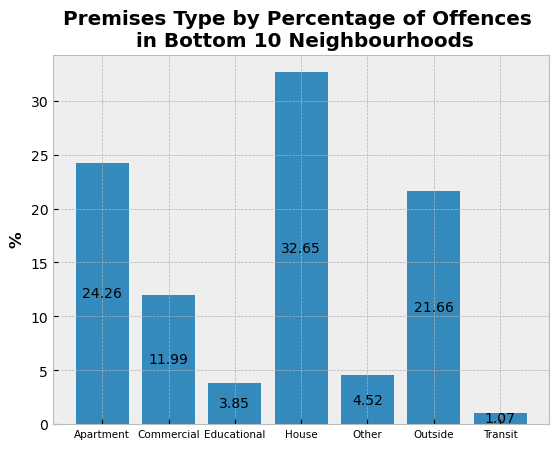

In [23]:
#Premises type for bottom 10 neighbourhoods
bottom_10_premises = bottom_10_df.groupby('PREMISES_TYPE', as_index = False)['EVENT_ID'].count()
bottom_10_premises['Pct of Offences'] = round((bottom_10_premises['EVENT_ID'] / bottom_10_premises['EVENT_ID'].sum()) * 100, 2)

#Plot premises type
fig, ax = plt.subplots(nrows = 1, ncols = 1)
#Set font size of x ticks for readability
plt.rcParams['xtick.labelsize'] = 7.5
#Plot premises type
ax.bar(bottom_10_premises['PREMISES_TYPE'], bottom_10_premises['Pct of Offences'])
#Set bar labels
for container in ax.containers:
    ax.bar_label(container, label_type = 'center')
#Set title and y axis label
plt.title('Premises Type by Percentage of Offences \n in Bottom 10 Neighbourhoods', fontdict = {'weight': 700})
plt.ylabel('%', fontdict = {'weight': 700})
plt.show()

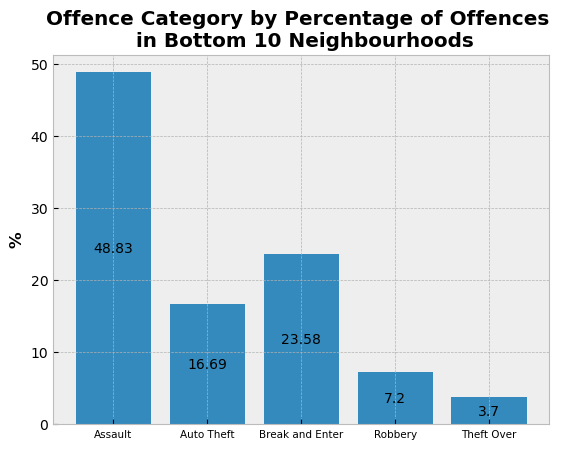

In [24]:
#MCI categories for bottom 10 neighbourhoods
bottom_10_mci = bottom_10_df.groupby('MCI_CATEGORY', as_index = False)['EVENT_ID'].count()
bottom_10_mci['Pct of Offences'] = round((bottom_10_mci['EVENT_ID'] / bottom_10_mci['EVENT_ID'].sum()) * 100, 2)
#Plot MCI categories
fig, ax = plt.subplots(nrows = 1, ncols = 1)
#Set x ticks font size for readability
plt.rcParams['xtick.labelsize'] = 9
#Generate bar plot
ax.bar(bottom_10_mci['MCI_CATEGORY'], bottom_10_mci['Pct of Offences'])
#Set bar labels
for container in ax.containers:
    ax.bar_label(container, label_type = 'center')
#Set title and y axis label
plt.title('Offence Category by Percentage of Offences \n in Bottom 10 Neighbourhoods', fontdict = {'weight': 700})
plt.ylabel('%', fontdict = {'weight': 700})
plt.show()

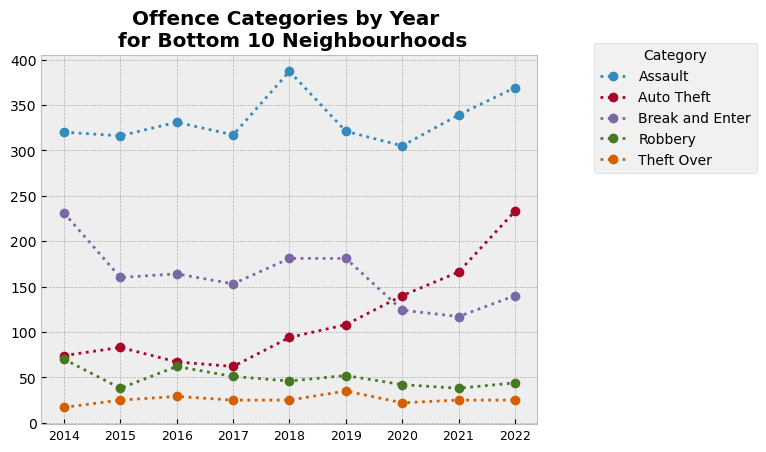

In [27]:
#Plot MCI categories by year for bottom 10
#Create separate series for each MCI category
bottom_10_assault = bottom_10_df.loc[bottom_10_df['MCI_CATEGORY'] == 'Assault'].groupby('OCC_YEAR')['EVENT_ID'].count()
bottom_10_auto_theft = bottom_10_df.loc[bottom_10_df['MCI_CATEGORY'] == 'Auto Theft'].groupby('OCC_YEAR')['EVENT_ID'].count()
bottom_10_break_enter = bottom_10_df.loc[bottom_10_df['MCI_CATEGORY'] == 'Break and Enter'].groupby('OCC_YEAR')['EVENT_ID'].count()
bottom_10_robbery = bottom_10_df.loc[bottom_10_df['MCI_CATEGORY'] == 'Robbery'].groupby('OCC_YEAR')['EVENT_ID'].count()
bottom_10_theft_over = bottom_10_df.loc[bottom_10_df['MCI_CATEGORY'] == 'Theft Over'].groupby('OCC_YEAR')['EVENT_ID'].count()

#Generate figure and plots for each category
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.plot(bottom_10_assault.index, bottom_10_assault.values, 'o:', label = 'Assault')
ax.plot(bottom_10_auto_theft.index, bottom_10_auto_theft.values, 'o:', label = 'Auto Theft')
ax.plot(bottom_10_break_enter.index, bottom_10_break_enter.values,'o:', label = 'Break and Enter')
ax.plot(bottom_10_robbery.index, bottom_10_robbery.values, 'o:', label = 'Robbery')
ax.plot(bottom_10_theft_over.index, bottom_10_theft_over.values, 'o:', label = 'Theft Over')

#Set title and legend
plt.title('Offence Categories by Year \n for Bottom 10 Neighbourhoods', fontdict = {'weight': 700})
plt.legend(bbox_to_anchor=(1.1, 1.05), title = 'Category')
plt.show()

## Year over Year Change in Neighbourhoods
### Analyze the neighbourhood with the greatest YoY increase, and the neighbourhood with the greatest YoY decrease.

In [28]:
#Group df by neighbourhood and year, then get the count of MCI categories
neighbourhood_offences = df.groupby(['NEIGHBOURHOOD', 'OCC_YEAR'], as_index = False)['MCI_CATEGORY'].count()

In [29]:
#Add a new column to neighbourhood_offences to calculate the year-over-year change in offences using .pct_change()
neighbourhood_offences['YoY % Change'] = (round(neighbourhood_offences['MCI_CATEGORY'].pct_change() * 100, 2))
#Change the values for 2014 to 0 as this dataset begins in 2014
neighbourhood_offences.loc[neighbourhood_offences['OCC_YEAR'] == 2014, 'YoY % Change'] = 0
neighbourhood_offences

,NEIGHBOURHOOD,OCC_YEAR,MCI_CATEGORY,YoY % Change
0,Agincourt North,2014,170,0.00
1,Agincourt North,2015,183,7.65
2,Agincourt North,2016,157,-14.21
3,Agincourt North,2017,175,11.46
4,Agincourt North,2018,226,29.14
...,...,...,...,...
1417,Yorkdale-Glen Park,2018,324,8.36
1418,Yorkdale-Glen Park,2019,400,23.46
1419,Yorkdale-Glen Park,2020,342,-14.50
1420,Yorkdale-Glen Park,2021,316,-7.60


In [30]:
#Sort neighbourhood_offences by YoY % Change in descending order to get neighbourhoods with greatest YoY change
descending_neighbourhood_offences = neighbourhood_offences.sort_values(by = 'YoY % Change', ascending = False)
descending_neighbourhood_offences.head()

,NEIGHBOURHOOD,OCC_YEAR,MCI_CATEGORY,YoY % Change
462,Forest Hill South,2017,107,94.55
26,Alderwood,2022,148,89.74
453,Forest Hill North,2017,106,89.29
791,Maple Leaf,2022,111,85.00
867,Mount Pleasant East,2017,84,82.61


In [31]:
#Sort neighbourhood_offences by YoY % Change in ascending order to get neighbourhoods with least YoY change
ascending_neighbourhood_offences = neighbourhood_offences.sort_values(by = 'YoY % Change')
ascending_neighbourhood_offences.head()

,NEIGHBOURHOOD,OCC_YEAR,MCI_CATEGORY,YoY % Change
555,Highland Creek,2020,59,-52.80
793,Markland Wood,2015,48,-47.25
786,Maple Leaf,2017,40,-45.95
780,Malvern West,2020,114,-43.00
690,Kingsway South,2020,54,-40.66


In [32]:
#Separate highest (Forest Hill South) and lowest (Highland Creek) neighbourhood in their own dataframes
fhs_hood = df.loc[df['NEIGHBOURHOOD'] == 'Forest Hill South']
hc_hood = df.loc[df['NEIGHBOURHOOD'] == 'Highland Creek']

In [33]:
#Define a function to generate 2 plots on the same figure showing the offence categories by month in the year before and year of
def year_comparison(year1, year2, df, hood, ylim):
    #Create 2 dataframes for the 2 years
    year1_df = df.loc[df['OCC_YEAR'] == year1]
    year2_df = df.loc[df['OCC_YEAR'] == year2]

    #Use pd.Categorical to sort months in chronological order in new dataframes
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    year1_df['OCC_MONTH'] = pd.Categorical(year1_df['OCC_MONTH'], categories = months, ordered = True)
    year2_df['OCC_MONTH'] = pd.Categorical(year2_df['OCC_MONTH'], categories = months, ordered = True)

    #Create figure with 2 subplots, set figure size and figure title weight using rcParams
    fig, ax = plt.subplots(nrows = 2, ncols = 1)
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.rcParams['figure.titleweight'] = 700

    #Year 1: For each MCI category, isolate rows from neighbourhood dataframe that correspond with the category and group by month to get the count
    year1_assault = year1_df.loc[year1_df['MCI_CATEGORY'] == 'Assault'].groupby('OCC_MONTH')['EVENT_ID'].count()
    year1_auto_theft = year1_df.loc[year1_df['MCI_CATEGORY'] == 'Auto Theft'].groupby('OCC_MONTH')['EVENT_ID'].count()
    year1_break_enter = year1_df.loc[year1_df['MCI_CATEGORY'] == 'Break and Enter'].groupby('OCC_MONTH')['EVENT_ID'].count()
    year1_robbery = year1_df.loc[year1_df['MCI_CATEGORY'] == 'Robbery'].groupby('OCC_MONTH')['EVENT_ID'].count()
    year1_theft_over = year1_df.loc[year1_df['MCI_CATEGORY'] == 'Theft Over'].groupby('OCC_MONTH')['EVENT_ID'].count()

    #Year 2: For each MCI category, isolate rows from neighbourhood dataframe that correspond with the category and group by month to get the count
    year2_assault = year2_df.loc[year2_df['MCI_CATEGORY'] == 'Assault'].groupby('OCC_MONTH')['EVENT_ID'].count()
    year2_auto_theft = year2_df.loc[year2_df['MCI_CATEGORY'] == 'Auto Theft'].groupby('OCC_MONTH')['EVENT_ID'].count()
    year2_break_enter = year2_df.loc[year2_df['MCI_CATEGORY'] == 'Break and Enter'].groupby('OCC_MONTH')['EVENT_ID'].count()
    year2_robbery = year2_df.loc[year2_df['MCI_CATEGORY'] == 'Robbery'].groupby('OCC_MONTH')['EVENT_ID'].count()
    year2_theft_over = year2_df.loc[year2_df['MCI_CATEGORY'] == 'Theft Over'].groupby('OCC_MONTH')['EVENT_ID'].count()
    
    #Create 5 line plots for each MCI category on the same plot for year 1
    ax[0].plot(year1_assault.index, year1_assault.values, label = 'Assault')
    ax[0].plot(year1_auto_theft.index, year1_auto_theft.values, label = 'Auto Theft')
    ax[0].plot(year1_break_enter.index, year1_break_enter.values, label = 'Break and Enter')
    ax[0].plot(year1_robbery.index, year1_robbery.values, label = 'Robbery')
    ax[0].plot(year1_theft_over.index, year1_theft_over.values, label = 'Theft Over')
    #Set ylim to match the scale of the y axis for ax[1]
    ax[0].set_ylim(0, ylim)
    #Set x ticks rotation and labels
    ax[0].set_xticks(ticks=np.arange(12), labels=[m[0:3] for m in year1_assault.index])
    #Set title and legend
    ax[0].set_title(year1, fontdict = {'weight': 700, 'size': 12})
    ax[0].legend(bbox_to_anchor=(1.05, .05), title = 'Category')   

    #Create 5 line plots for each MCI category on the same plot for year 2
    ax[1].plot(year2_assault.index, year2_assault.values, label = 'Assault')
    ax[1].plot(year2_auto_theft.index, year2_auto_theft.values, label = 'Auto Theft')
    ax[1].plot(year2_break_enter.index, year2_break_enter.values, label = 'Break and Enter')
    ax[1].plot(year2_robbery.index, year2_robbery.values, label = 'Robbery')
    ax[1].plot(year2_theft_over.index, year2_theft_over.values, label = 'Theft Over')
    #Set ylim for ax[0] and ax[1] x axes to match
    ax[1].set_ylim(0, ylim)
    #Set x ticks rotation and labels
    ax[1].set_xticks(ticks=np.arange(12), labels=[m[0:3] for m in year2_assault.index])
    #Set title and legend
    ax[1].set_title(year2, fontdict = {'weight': 700, 'size': 12})

    #Set figure title
    fig.suptitle(f'Offence Categories by Month for {hood}, {year1}-{year2}')

    #Adjust space between subplots for readability and show figure
    plt.subplots_adjust(hspace = 0.5)
    plt.show()

    


/var/folders/m2/ysnn55010957_py0m5n5dds40000gn/T/ipykernel_89954/3845246449.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year1_df['OCC_MONTH'] = pd.Categorical(year1_df['OCC_MONTH'], categories = months, ordered = True)
/var/folders/m2/ysnn55010957_py0m5n5dds40000gn/T/ipykernel_89954/3845246449.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year2_df['OCC_MONTH'] = pd.Categorical(year2_df['OCC_MONTH'], categories = months, ordered = True)


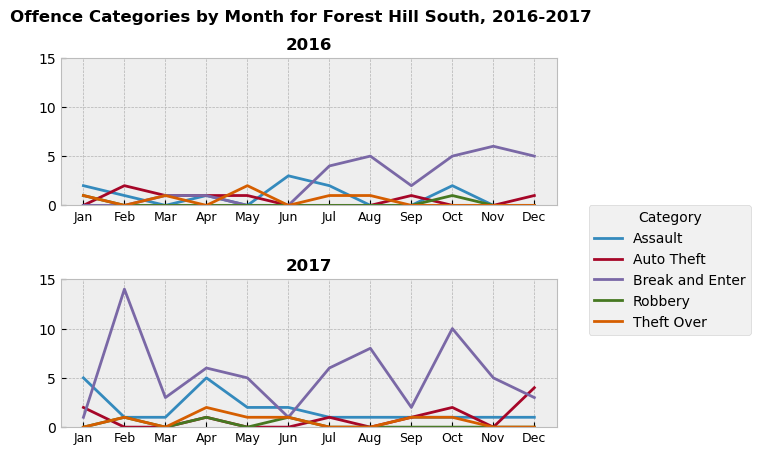

In [34]:
#Call year_comparison function for Forest Hill South, 2016 vs 2017
year_comparison(2016, 2017, fhs_hood, 'Forest Hill South', 15)

In [35]:
#Get percentage change in offence categories 2016 vs 2017 for Forest Hill South
fhs_2016_off = fhs_hood.loc[fhs_hood['OCC_YEAR'] == 2016].groupby(['OCC_YEAR', 'MCI_CATEGORY'], as_index = False)['EVENT_ID'].count()
fhs_2017_off = fhs_hood.loc[fhs_hood['OCC_YEAR'] == 2017].groupby(['OCC_YEAR', 'MCI_CATEGORY'], as_index = False)['EVENT_ID'].count()
print(fhs_2016_off)
print(fhs_2017_off)

   OCC_YEAR     MCI_CATEGORY  EVENT_ID
0      2016          Assault        11
1      2016       Auto Theft         7
2      2016  Break and Enter        29
3      2016          Robbery         2
4      2016       Theft Over         6
   OCC_YEAR     MCI_CATEGORY  EVENT_ID
0      2017          Assault        22
1      2017       Auto Theft        11
2      2017  Break and Enter        64
3      2017          Robbery         3
4      2017       Theft Over         7


/var/folders/m2/ysnn55010957_py0m5n5dds40000gn/T/ipykernel_89954/3845246449.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year1_df['OCC_MONTH'] = pd.Categorical(year1_df['OCC_MONTH'], categories = months, ordered = True)
/var/folders/m2/ysnn55010957_py0m5n5dds40000gn/T/ipykernel_89954/3845246449.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year2_df['OCC_MONTH'] = pd.Categorical(year2_df['OCC_MONTH'], categories = months, ordered = True)


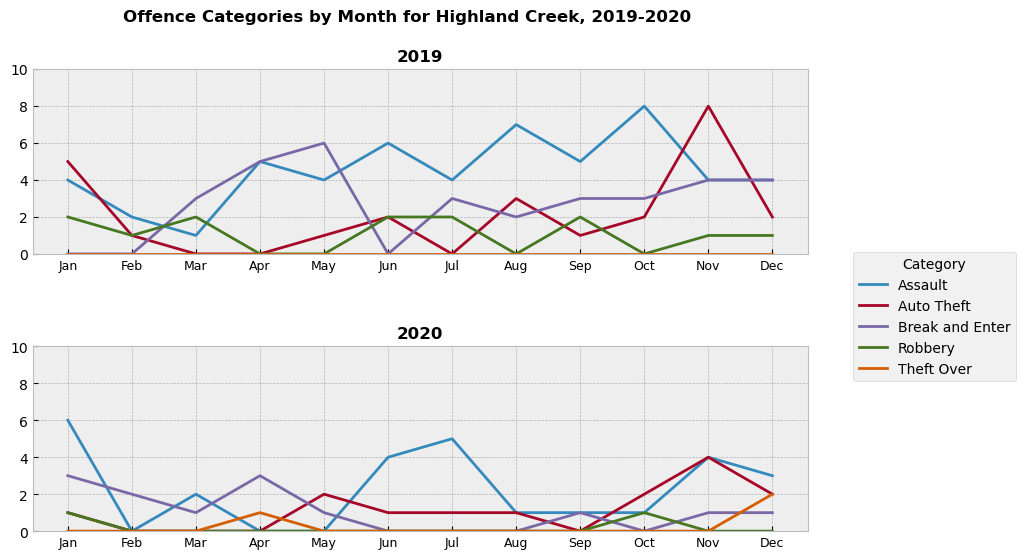

In [36]:
#Call year_comparison function for Highland Creek, 2019-2020
year_comparison(2019, 2020, hc_hood, 'Highland Creek', 10)

In [37]:
#Get percentage change in offence categories 2019 vs 2020 for Highland Creek
hc_2019_off = hc_hood.loc[hc_hood['OCC_YEAR'] == 2019].groupby(['OCC_YEAR', 'MCI_CATEGORY'], as_index = False)['EVENT_ID'].count()
hc_2020_off = hc_hood.loc[hc_hood['OCC_YEAR'] == 2020].groupby(['OCC_YEAR', 'MCI_CATEGORY'], as_index = False)['EVENT_ID'].count()
print(hc_2019_off)
print(hc_2020_off)

   OCC_YEAR     MCI_CATEGORY  EVENT_ID
0      2019          Assault        54
1      2019       Auto Theft        25
2      2019  Break and Enter        33
3      2019          Robbery        13
   OCC_YEAR     MCI_CATEGORY  EVENT_ID
0      2020          Assault        27
1      2020       Auto Theft        14
2      2020  Break and Enter        13
3      2020          Robbery         2
4      2020       Theft Over         3


## Correlation between Premises Type and MCI Category

In [38]:
#Group df by MCI category and occurence month, then get count of events
grouped_cat_month = df.groupby(['MCI_CATEGORY', 'OCC_MONTH'], as_index = False)['EVENT_ID'].count()
grouped_cat_month

,MCI_CATEGORY,OCC_MONTH,EVENT_ID
0,Assault,April,12054
1,Assault,August,13743
2,Assault,December,12439
3,Assault,February,10966
4,Assault,January,11976
5,Assault,July,14238
6,Assault,June,13795
7,Assault,March,12158
8,Assault,May,13751
9,Assault,November,12657


In [39]:
#Make a copy of the dataframe to reorder the months
grouped_cat_month_copy = grouped_cat_month.copy()
grouped_cat_month_copy.head()

,MCI_CATEGORY,OCC_MONTH,EVENT_ID
0,Assault,April,12054
1,Assault,August,13743
2,Assault,December,12439
3,Assault,February,10966
4,Assault,January,11976


In [40]:
#Reorder the months chronologically with pd.Categorical
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
grouped_cat_month_copy['OCC_MONTH'] = pd.Categorical(grouped_cat_month_copy['OCC_MONTH'], categories = months, ordered = True) 

In [41]:
#Sort by month
grouped_cat_month_copy.sort_values(by = 'OCC_MONTH', inplace = True)
grouped_cat_month_copy

,MCI_CATEGORY,OCC_MONTH,EVENT_ID
28,Break and Enter,January,5239
4,Assault,January,11976
40,Robbery,January,2153
16,Auto Theft,January,2999
52,Theft Over,January,780
15,Auto Theft,February,2772
27,Break and Enter,February,4486
3,Assault,February,10966
39,Robbery,February,1958
51,Theft Over,February,724


In [42]:
#Group df by premises type and occurrence month to get the count of events
grouped_premises_type = df.groupby(['PREMISES_TYPE', 'OCC_MONTH'], as_index = False)['EVENT_ID'].count()

In [43]:
#Copy grouped_premises_type to reorder months using pd.Categorical
grouped_premises_copy = grouped_premises_type.copy()

In [44]:
#Order months in chronological order using pd.Categorical
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
grouped_premises_copy['OCC_MONTH'] = pd.Categorical(grouped_premises_copy['OCC_MONTH'], categories = months, ordered = True)

In [45]:
#Sort df by occurence month
grouped_premises_copy.sort_values(by = 'OCC_MONTH', inplace = True)
grouped_premises_copy

,PREMISES_TYPE,OCC_MONTH,EVENT_ID
28,Educational,January,560
64,Outside,January,4877
16,Commercial,January,5025
4,Apartment,January,6229
40,House,January,4338
...,...,...,...
74,Transit,December,760
50,Other,December,1360
62,Outside,December,5409
2,Apartment,December,6241


In [48]:
#Define function to generate scatter plot and linear regression for a category and a premise type, as well as print the r-squared and the Pearson r
def premise_cat_scatter(category, premise):
    #Use .loc to get dataframes for the premise and the category
    category_df = grouped_cat_month_copy.loc[grouped_cat_month_copy['MCI_CATEGORY'] == category]
    premise_df = grouped_premises_copy.loc[grouped_premises_copy['PREMISES_TYPE'] == premise]

    #Linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(category_df['EVENT_ID'], premise_df['EVENT_ID'])
    regress_values = category_df['EVENT_ID'] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #R-squared
    print(f'The r-squared is {rvalue**2}.')

    #Correlation (pearson r)
    correlation = st.pearsonr(category_df['EVENT_ID'], premise_df['EVENT_ID'])
    print(f'The correlation between {category} and {premise} is {correlation[0]}.')

    #Generate scatter plot, set title and axis labels
    plt.scatter(category_df['EVENT_ID'], premise_df['EVENT_ID'])
    plt.title(f'{category} vs {premise}')
    plt.xlabel(f'{category}')
    plt.ylabel(f'{premise}')

    #Plot linear regression line equation
    plt.plot(category_df['EVENT_ID'],regress_values,"r-")

    plt.show()

The r-squared is 0.8955820355770051.
The correlation between Assault and Outside is 0.9463519617864196.


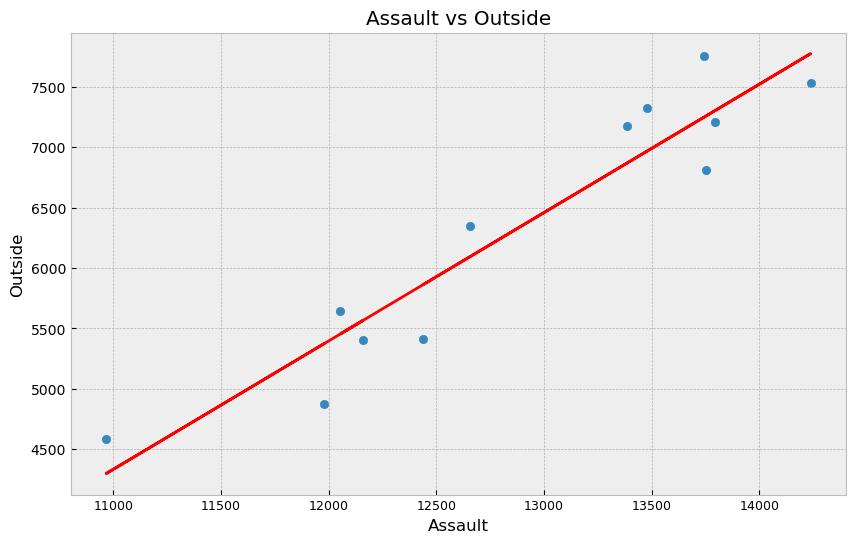

In [49]:
#Call premise_cat_scatter function for Assault and Outside
premise_cat_scatter('Assault', 'Outside')

The r-squared is 0.8111849501888441.
The correlation between Auto Theft and House is 0.900658065077332.


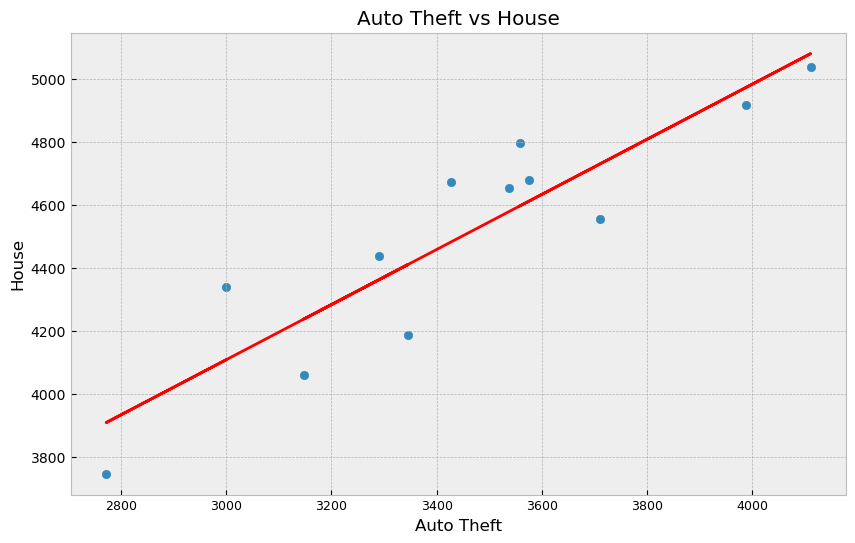

In [50]:
#Call premise_cat_scatter function for Auto Theft and House
premise_cat_scatter('Auto Theft', 'House')

The r-squared is 0.5941430339807302.
The correlation between Break and Enter and Commercial is 0.7708067423036268.


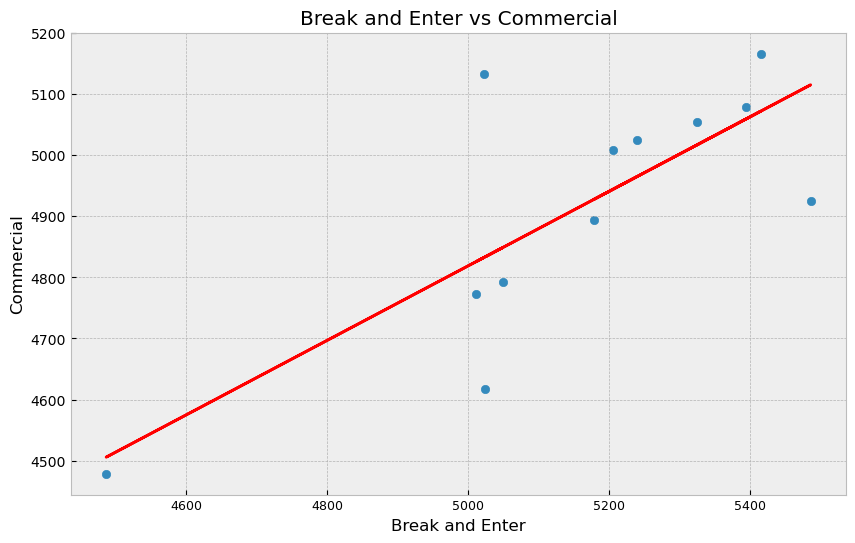

In [51]:
#Call premise_cat_scatter function for Break and Enter and Commercial
premise_cat_scatter('Break and Enter', 'Commercial')

The r-squared is 0.7701689828679038.
The correlation between Break and Enter and House is 0.8775927203822419.


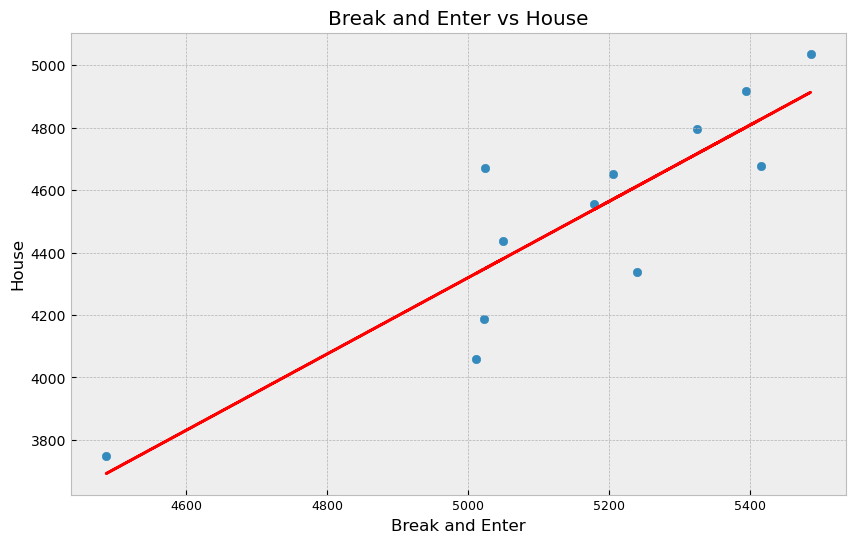

In [52]:
#Call premise_cat_scatter function for Break and Enter and House
premise_cat_scatter('Break and Enter', 'House')

The r-squared is 0.550881227447354.
The correlation between Robbery and Other is 0.7422137343429815.


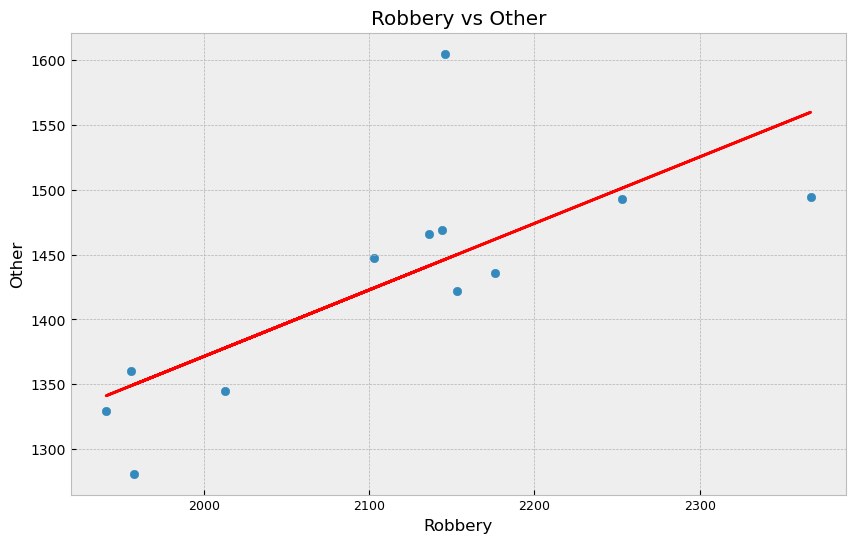

In [53]:
#Call premise_cat_scatter function for Robbery and Outside
premise_cat_scatter('Robbery', 'Other')

The r-squared is 0.7962000330997377.
The correlation between Theft Over and House is 0.8923004163955871.


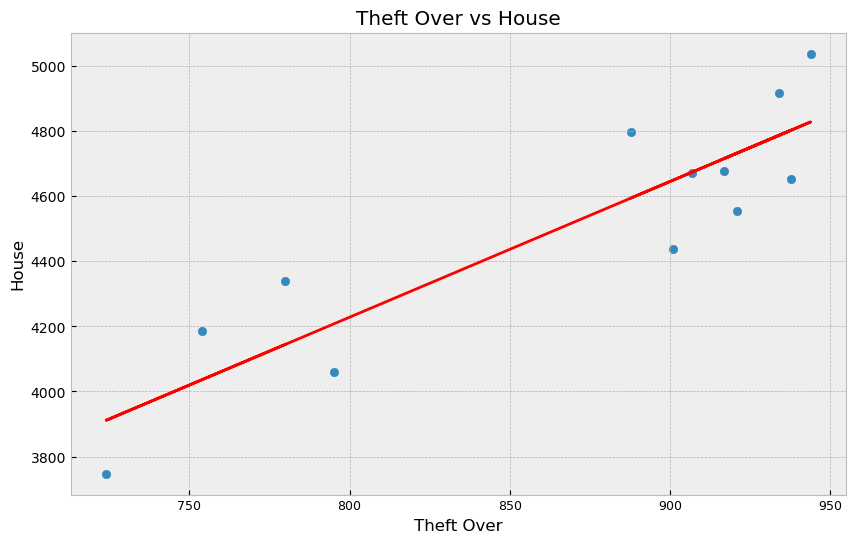

In [54]:
#Call premise_cat_scatter function for Theft Over and House
premise_cat_scatter('Theft Over', 'House')

The r-squared is 0.7434820289015519.
The correlation between Theft Over and Outside is 0.8622540396551079.


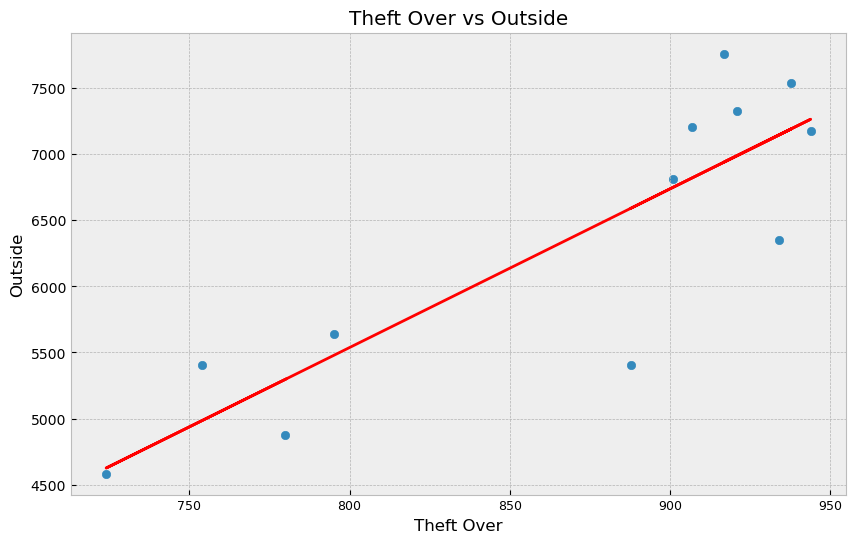

In [55]:
#Call premise_cat_scatter function for Theft Over and Outside
premise_cat_scatter('Theft Over', 'Outside')